In [21]:
from sklearn import datasets
import pandas as pd
import numpy as np

# Load the iris dataset
iris = datasets.load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

In [22]:

print("Shape of X:", iris.data.shape)
print("Shape of y:", iris.target.shape)
print("Feature Names:", iris.feature_names)
print("Target values:", iris.target)
print("Target names:", iris.target_names)
print("\n test \n")
print(iris.data[:5])
print(iris.target[:5])


Shape of X: (150, 4)
Shape of y: (150,)
Feature Names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target values: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
Target names: ['setosa' 'versicolor' 'virginica']

 test 

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0]


In [23]:
iris_df['species'] = iris.target
iris_df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [28]:
def initialise_parameters(n_feat, n_classes):
    W = np.random.randn(n_feat, n_classes) * 0.01
    b = np.zeros(n_classes)

    return W,b

W,b = initialise_parameters(4,3)
print("W shape:", W.shape)
print("b shape:", b.shape)


W shape: (4, 3)
b shape: (3,)


In [34]:
def softmax(scores):
    scores_shifted = scores - np.max(scores, axis=1, keepdims=True)
    exp_scores = np.exp(scores_shifted)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    
    return probs 

def predict(X, W,b):
    scores = X @ W + b 

    probs = softmax(scores)
    preds = np.argmax(probs,axis=1)

    return probs, preds
    

    

In [35]:
probabilities, predictions = predict(iris.data, W, b)
print("Predictions shape:", predictions.shape)
print("First 10 predictions:", predictions[:10])

Predictions shape: (150,)
First 10 predictions: [2 2 2 2 2 2 2 2 2 2]


In [39]:
def compute_loss_and_gradients(X, y, W, b=None):
    n_samples = X.shape[0]
    scores = X @ W
    if b is not None:
        scores = scores + b
    
    probs = softmax(scores)
    
    correct_class_probs = probs[np.arange(n_samples), y]
    loss = -np.mean(np.log(correct_class_probs))
    
    dscores = probs.copy()
    dscores[np.arange(n_samples), y] -= 1
    dscores /= n_samples
    
    dW = X.T @ dscores
    db = np.sum(dscores, axis=0) if b is not None else None
    
    return loss, dW, db

compute_loss_and_gradients(iris.data, iris.target, W, b)

(np.float64(1.1009758342543927),
 array([[ 0.05739029, -0.13032349,  0.0729332 ],
        [-0.23963949,  0.04659299,  0.1930465 ],
        [ 0.62312369, -0.23838313, -0.38474055],
        [ 0.27230935, -0.06597285, -0.20633651]]),
 array([-0.03767247, -0.01630775,  0.05398022]))

In [44]:
def train(X, y, n_feat, n_classes, lr=0.01, iterations=1000, use_bias=True):
    W,b = initialise_parameters(n_feat, n_classes)

    if use_bias == False:
        b = None

    losses = []

    for i in range (1,iterations):
        loss, dW, db = compute_loss_and_gradients(X, y, W, b)
        losses.append(loss)

        W = W - lr*dW
        if use_bias == True:
            b = b - lr*db
        print(f"Iteration {i}: Loss = {loss:.4f}")

    return W, b, losses



Train size: 120, Test size: 30
Iteration 1: Loss = 1.0990
Iteration 2: Loss = 1.0327
Iteration 3: Loss = 0.9758
Iteration 4: Loss = 0.9274
Iteration 5: Loss = 0.8877
Iteration 6: Loss = 0.8562
Iteration 7: Loss = 0.8341
Iteration 8: Loss = 0.8233
Iteration 9: Loss = 0.8194
Iteration 10: Loss = 0.8316
Iteration 11: Loss = 0.8282
Iteration 12: Loss = 0.8481
Iteration 13: Loss = 0.8197
Iteration 14: Loss = 0.8380
Iteration 15: Loss = 0.7956
Iteration 16: Loss = 0.8173
Iteration 17: Loss = 0.7717
Iteration 18: Loss = 0.7982
Iteration 19: Loss = 0.7511
Iteration 20: Loss = 0.7814
Iteration 21: Loss = 0.7332
Iteration 22: Loss = 0.7665
Iteration 23: Loss = 0.7173
Iteration 24: Loss = 0.7531
Iteration 25: Loss = 0.7031
Iteration 26: Loss = 0.7408
Iteration 27: Loss = 0.6903
Iteration 28: Loss = 0.7294
Iteration 29: Loss = 0.6785
Iteration 30: Loss = 0.7188
Iteration 31: Loss = 0.6676
Iteration 32: Loss = 0.7087
Iteration 33: Loss = 0.6574
Iteration 34: Loss = 0.6993
Iteration 35: Loss = 0.647

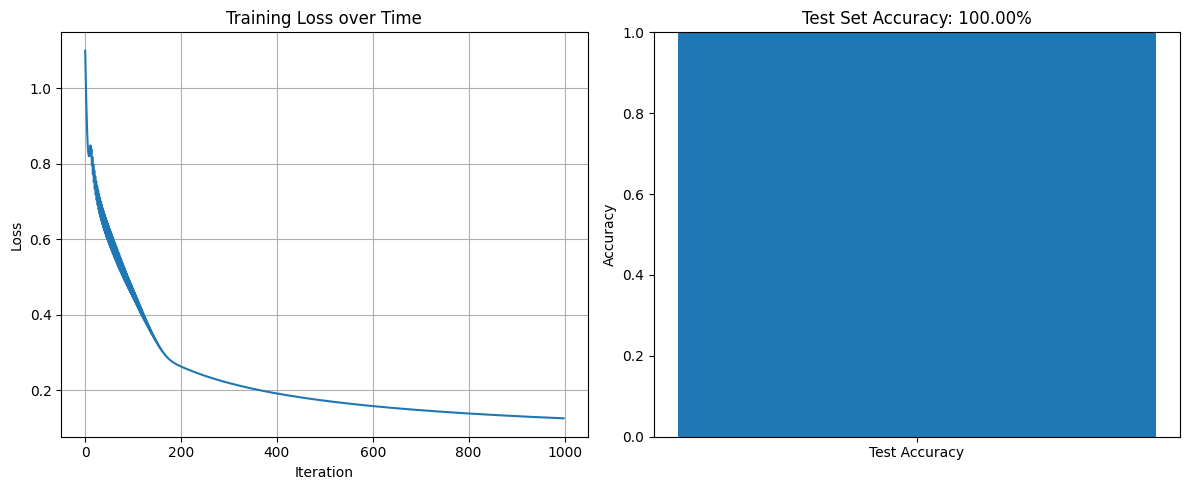

In [49]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)

print(f"Train size: {X_train.shape[0]}, Test size: {X_test.shape[0]}")

W_trained, b_trained, losses = train(X_train, y_train,4,3, 0.1, 1000)

probs, y_pred_test = predict(X_test, W_trained, b_trained)
test_accuracy = np.mean(y_pred_test == y_test)

print(f"\nTest Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(losses)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Training Loss over Time')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.bar(['Test Accuracy'], [test_accuracy])
plt.ylim([0, 1])
plt.ylabel('Accuracy')
plt.title(f'Test Set Accuracy: {test_accuracy:.2%}')

plt.tight_layout()
plt.show()

In [53]:

probs, y_pred_train = predict(X_train, W_trained, b_trained)
train_accuracy = np.mean(y_pred_train == y_train)
print(f"Train Accuracy: {train_accuracy:.4f}")

from sklearn.metrics import confusion_matrix
probs, y_pred_all = predict(iris.data, W_trained, b_trained)
cm = confusion_matrix(iris.target, y_pred_all)
print("\nConfusion Matrix (all data):")
print(cm)

Train Accuracy: 0.9750

Confusion Matrix (all data):
[[50  0  0]
 [ 0 47  3]
 [ 0  0 50]]
